In [1]:
import tensorflow as tf
import numpy as np

# 数据处理

## tf.constant() 类似于np.array(),数据转换为张量

In [2]:
tf.constant(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

2021-11-02 10:27:00.030218: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-02 10:27:00.032449: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-02 10:27:00.034795: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
tf.constant(1.)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [4]:
#tf.constant(2.2,dtype=tf.int32)不能这样强制转换类型

In [5]:
tf.constant(2.,dtype=tf.double)#浮点转换双精度是可以的

<tf.Tensor: shape=(), dtype=float64, numpy=2.0>

In [6]:
tf.constant([1,2,3])#几个括号表示几个维度

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [7]:
tf.constant([[True,False,True],[False,False,True]])

<tf.Tensor: shape=(2, 3), dtype=bool, numpy=
array([[ True, False,  True],
       [False, False,  True]])>

In [8]:
tf.constant('hello,world.')

<tf.Tensor: shape=(), dtype=string, numpy=b'hello,world.'>

## tf.device() 返回张量使用的cpu或者gpu代号

In [9]:
with tf.device("cpu"):
    a = tf.constant([1])
a.device

'/job:localhost/replica:0/task:0/device:CPU:0'

In [10]:
with tf.device("gpu"):#无gpu就默认cpu
    b = tf.constant([1])
b.device

'/job:localhost/replica:0/task:0/device:CPU:0'

## tf.gpu() tf.cpu() 转移gpu或者cpu

In [11]:
c=b.cpu()
#d=a.gpu()#暂时没有gpu
print(c.device)

Instructions for updating:
Use tf.identity instead.
/job:localhost/replica:0/task:0/device:CPU:0


## tf.numpy()  用于tensor到array的转换

In [12]:
b.numpy()

array([1], dtype=int32)

## tf.ndim用于返回tensor的维度

In [13]:
b.ndim

1

## tf.rank()以tensor形式返回tensor维度

In [ ]:
tf.rank(b)

## tf.shape 返回tensor形状

In [ ]:
b.shape

## tf.is_tensor()判断数据是否是tensor

In [ ]:
tf.is_tensor(b)

## tf.dtype() 获得tensor的数据类型

In [ ]:
a.dtype==tf.int32

## tf.convert_to_tensor() 用于array到tensor的转换

In [ ]:
a = np.arange(5)
a

In [ ]:
a.dtype

In [ ]:
aa = tf.convert_to_tensor(a)

In [ ]:
aa = tf.convert_to_tensor(a,dtype=tf.int32)

## tf.cast() 用于数据转换

In [ ]:
tf.cast(aa,dtype=tf.bool)

In [ ]:
tf.cast(aa,dtype=tf.float32)

## tf.Variable() 表示可训练的tensor，例如w和b

In [ ]:
b = tf.Variable(a)

In [ ]:
b.trainable#表示反向传播过程会对trainable进行求导

## tf.zeros() 生成相应形状的全0的tensor

In [ ]:
tf.zeros([])

In [ ]:
tf.zeros([1,2])

## tf.zeros_like() 生成一个与某个tensor形状一样的tensor

In [ ]:
tf.zeros_like(a)

## tf.ones（）生成相应形状的全1的tesnor

In [ ]:
tf.ones([])

In [ ]:
tf.ones([1,2])

## tf.ones_like() 生成一个全为1与某个tensor形状一样的tensor

In [ ]:
tf.ones_like(a)

## tf.fill 用指定元素填充相应形状的tensor

In [ ]:
tf.fill([1,2],2)

## tf.random.normal() 正态随机分布tensor

In [ ]:
tf.random.normal([2,2],mean=1,stddev=1)

## m.truncated_normal 添加sigmod函数的正态分布

In [ ]:
tf.random.truncated_normal([2,2],mean=0,stddev=1)

## tf.random.uniform()均匀分布随机

In [ ]:
tf.random.uniform([2,2],minval=0,maxval=1)

## 随机打散目标值和label

In [ ]:
idx=tf.range(10)

In [ ]:
idx=tf.random.shuffle(idx)#使用shuffle来随机打散数据
idx

In [ ]:
a=tf.random.normal([10,784])#训练数据

In [ ]:
b=tf.random.uniform([10],maxval=10,minval=0,dtype=tf.int32)#训练标签
b

In [ ]:
a = tf.gather(a,idx)#按照对应的索引打乱数据

In [ ]:
b = tf.gather(b,idx)#按照对应的索引打乱标签

## loss tenor中的标量

In [ ]:
x = tf.random.uniform([4,10])#4个样本，10个特征
x

In [ ]:
y = tf.range(4)#每个样本对应的标签
print(y)
y = tf.one_hot(y,depth=10)#将对应位置的索引变为1，其他为0 one_hot编码
y

In [ ]:
loss=tf.keras.losses.mse(y,x)#计算每一个样本的均方差
loss

In [ ]:
loss=tf.reduce_mean(loss)#计算均方差的平均值
loss

## Vector tenor中的向量

In [ ]:
net = tf.keras.layers.Dense(10)
net.build((4,8))#第一个参数是样本数目，第二个数表示前一层神经网络节点数目

In [ ]:
net.kernel#现实权值

In [ ]:
net.bias

## Matrix tensor中的矩阵（2维向量）

In [ ]:
x = tf.random.normal([4,784])

In [ ]:
net = tf.keras.layers.Dense(10)
net.build((4,784))#建立权值

In [ ]:
net(x).shape

In [ ]:
net.kernel.shape

In [ ]:
net.bias.shape#网络本身的长度

# 索引

## 普通索引

In [ ]:
a = tf.random.uniform([3,4,5])#3维，4行，5列
a

In [ ]:
a.shape

In [ ]:
a[:,0,0]#取每一维的第0行的第0列

In [ ]:
a[:][:][0]#不推荐这种方法

In [ ]:
a[:,0,0:-1:2]#每一维的第一行再从第1列到倒数第一列各一列取一个。 A：B：step

In [ ]:
a[::-1,:,0]#倒序取每一个纬度的第一列

In [ ]:
a[0,...]#...表示中间的若干维度全取

## tf.gather() 按照给定维度给定索引进行切片

In [ ]:
tf.gather(a,axis=0,indices=[0,2])#表示按照第0个维度，取第0和第2个索引。默认第0个维度

In [ ]:
tf.gather(a,axis=1,indices=[2,1,3])#取2，1，3行

## tf.gather_nd() 同时用多个维度来索引

In [ ]:
tf.gather_nd(a,[[0,0,0],[1,1,1]])#采了第0维度0行0列以及1维度1行1列

In [ ]:
#tf.gather_nd(a,[[0,1,:],[1,2,:]])#不可以这样，gather必须给出索引

In [ ]:
tf.gather_nd(a,[[0,1],[1,2]])#全部取值省略写

## tf.boolean_mask()按照bool来返回tensor

In [ ]:
a.shape

In [ ]:
tf.boolean_mask(a,mask=[True,True,False])#默认维度是第0维，按照bool来返回

In [ ]:
tf.boolean_mask(a,mask=[True,False,True,False],axis=1)#第一维度

In [ ]:
tf.boolean_mask(a,mask=[[True,False,True,False],[True,False,True,False],[True,False,True,False]])#mask是一个(3,4)的bool list所以对应tensor形状（3，4，5）有取每一个（3，4）下的5个元素

## tf.where() 判断返回a,b 多参数

In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])

In [ ]:
a = tf.constant(a)
b = tf.constant(b)

In [ ]:
condition = tf.constant([True,False,True])

In [ ]:
tf.where(condition,a,b)

# 维度处理

## tf.reshape() 用于改变view

In [74]:
image = tf.random.normal([4,28,28,3])

In [75]:
image_view2 = tf.reshape(image,[4,784,3])

## tf.transpose() 改变content

In [76]:
#例如说一个图片的4维度代表[b,h,w,c]我们通过transpose可以改变数据维度的顺序
a = tf.random.normal((4,3,2,1))

In [77]:
a.shape

TensorShape([4, 3, 2, 1])

In [78]:
tf.transpose(a).shape

TensorShape([1, 2, 3, 4])

In [79]:
tf.transpose(a,perm=[0,2,3,1]).shape#以相应的下标顺序改变维度

TensorShape([4, 2, 1, 3])

## tf.expend_dims()增加维度

In [80]:
a = tf.random.normal([4,35,8])
tf.expand_dims(a,axis=0).shape

TensorShape([1, 4, 35, 8])

In [81]:
tf.expand_dims(a,axis=1).shape

TensorShape([4, 1, 35, 8])

In [82]:
tf.expand_dims(a,axis=2).shape

TensorShape([4, 35, 1, 8])

In [83]:
tf.expand_dims(a,axis=3).shape

TensorShape([4, 35, 8, 1])

In [84]:
tf.expand_dims(a,axis=-2).shape

TensorShape([4, 35, 1, 8])

## tf.squeeze()减少维度为1的维度

In [85]:
tf.squeeze(tf.zeros([1,2,1,1,3])).shape

TensorShape([2, 3])

In [86]:
a = tf.zeros([1,2,1,3])

In [87]:
tf.squeeze(a,axis=0).shape#减少固定索引维数

TensorShape([2, 1, 3])

## tf.broacast_to() 自动扩张维度 由小维度开始扩张，无维度变1，1维度扩张为相同维度，其他情况不可以，可以优化空间

In [88]:
x = tf.random.normal([4,32,32,3])

In [89]:
(x+tf.random.normal([3])).shape#自动调用broacast_to扩张维度

TensorShape([4, 32, 32, 3])

In [90]:
b=tf.broadcast_to(tf.random.normal([4,1,1,1]),[4,32,32,3])#给定类型显示的转换数据维度
b.shape

TensorShape([4, 32, 32, 3])

# tensor数学运算

In [91]:
a = tf.fill([2,2],2.)
b = tf.ones([2,2])

## 对应元素计算（不是矩阵的*/哦）

In [92]:
a+b,a-b,a*b,a/b

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[3., 3.],
        [3., 3.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[2., 2.],
        [2., 2.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[2., 2.],
        [2., 2.]], dtype=float32)>)

In [93]:
a//b,a%b

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[2., 2.],
        [2., 2.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0., 0.],
        [0., 0.]], dtype=float32)>)

In [94]:
tf.math.log(b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [95]:
tf.exp(b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2.7182817, 2.7182817],
       [2.7182817, 2.7182817]], dtype=float32)>

In [96]:
tf.math.log(8.0)/tf.math.log(2.)#log（2）8 以2为底

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

## 平方

In [97]:
tf.pow(a,3)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[8., 8.],
       [8., 8.]], dtype=float32)>

## 开方

In [98]:
tf.sqrt(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.4142134, 1.4142134],
       [1.4142134, 1.4142134]], dtype=float32)>

## 矩阵乘法 如果不满足乘法准则，会自动进行broat_cast扩张，如果还是不行就是不符合数学规则

In [99]:
a@b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

In [100]:
tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

### 3维度的矩阵乘法

In [101]:
a = tf.ones([4,2,3])
b = tf.fill([4,3,5],2.)

In [102]:
(a@b).shape#后面两个维度进行矩阵乘法，相当于4个2维矩阵同时计算

TensorShape([4, 2, 5])

# 合并与分割

## tf.concat()按照某个维度进行合并

In [103]:
a = tf.random.normal([4,35,8])
b = tf.random.normal([2,35,8])
c = tf.random.normal([2,35,8])

In [104]:
d=tf.concat([a,b],axis=0)#在第0个维度上合并,但是要保证其他维度的一致性
d.shape

TensorShape([6, 35, 8])

## tf.stack（）按照一个新的维度叠加

In [105]:
tf.stack([c,b],axis=0).shape#要求合并的数据shape形状一样

TensorShape([2, 2, 35, 8])

In [106]:
tf.stack([b,c],axis=3).shape#可以在任意一个维度创建新维度

TensorShape([2, 35, 8, 2])

## tf.unstack() 全部打散某个维度 分割为长度为1的维度

In [107]:
aa = tf.unstack(a,axis=0)

In [108]:
aa[0].shape,aa[1].shape

(TensorShape([35, 8]), TensorShape([35, 8]))

## tf.split()

In [109]:
aaa = tf.split(a,axis=2,num_or_size_splits=2)#分成两组
aaa[0].shape

TensorShape([4, 35, 4])

In [110]:
aaa = tf.split(a,axis=2,num_or_size_splits=[2,2,4])#指定打散

In [111]:
aaa[0].shape,aaa[1].shape,aaa[2].shape

(TensorShape([4, 35, 2]), TensorShape([4, 35, 2]), TensorShape([4, 35, 4]))

# 数据统计

## tf.norm() 求解2范数 全部数的平方和的开根号

In [112]:
a = tf.ones([2,2])
tf.norm(a)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [113]:
#等效与
tf.sqrt(tf.reduce_sum(tf.square(a)))

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

## tf.norm(a,ord,axis)#求解n范数

In [114]:
tf.norm(a,ord=2,axis=1)#ord表示几范数，axis表示求解第几个维度的范数 可以理解为，把这个维度上的数计算范数，最后的结果是把这个维度变成了1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.4142135, 1.4142135], dtype=float32)>

In [115]:
tf.norm(a,ord=1,axis=0)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>

## tf.reduce_min/max/mean

In [116]:
a = tf.random.normal([4,10])

In [117]:
tf.reduce_min(a),tf.reduce_max(a),tf.reduce_mean(a)

(<tf.Tensor: shape=(), dtype=float32, numpy=-1.23712>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0356772>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.13674217>)

In [118]:
tf.reduce_min(a,axis=1),tf.reduce_max(a,axis=1),tf.reduce_mean(a,axis=1)#求解第1维度的。。。

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.7879081 , -0.35007125, -0.84858495, -1.23712   ], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.63253486, 2.0356772 , 1.1415284 , 1.973542  ], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.20055667,  0.5886845 ,  0.10242031,  0.05642058], dtype=float32)>)

In [119]:
a.shape

TensorShape([4, 10])

## tf.argmax(a)/min返回最大值索引

In [120]:
tf.argmax(a,axis=1)#默认axis=0

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([7, 8, 7, 2])>

## tf.equal() 比较

In [121]:
a = tf.constant([0,2,2,2,5])

In [122]:
b = tf.range(5)

In [123]:
res = tf.equal(a,b)

In [124]:
tf.reduce_sum(tf.cast(res,dtype=tf.int32))#可以求相同元素的数目

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [125]:
unique = tf.unique(a)#前面表格对应的是不重复数表格，后面对应的是原表格中对应不重复数表格的索引

In [126]:
#用tf.gather还原unique
tf.gather(unique[0],unique[1])

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 2, 2, 5], dtype=int32)>

## 排序

## tf.sort

In [127]:
a = tf.random.shuffle(tf.range(5))

In [128]:
tf.sort(a,direction='DESCENDING')#由大到小排序

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 3, 2, 1, 0], dtype=int32)>

In [129]:
idx = tf.argsort(a,direction='DESCENDING')#返回排序索引

In [130]:
tf.gather(a,idx)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 3, 2, 1, 0], dtype=int32)>

In [131]:
tf.sort(a)#由小到大

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>

In [132]:
tf.argsort(a)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 1, 3, 2, 0], dtype=int32)>

In [133]:
b = tf.random.uniform([3,3],maxval=10,dtype=tf.int32)

In [134]:
tf.sort(b,axis=0)#axis默认是最后一个维度

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 1],
       [0, 3, 1],
       [7, 9, 4]], dtype=int32)>

In [135]:
argsort = tf.argsort(b,axis=0)

## tf.math.top_k() 返回最大的几个值和索引

In [136]:
b

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 9, 4],
       [7, 1, 1],
       [0, 3, 1]], dtype=int32)>

In [137]:
res = tf.math.top_k(b,2)
res

TopKV2(values=<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[9, 4],
       [7, 1],
       [3, 1]], dtype=int32)>, indices=<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [0, 1],
       [1, 2]], dtype=int32)>)

In [138]:
res[0]

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[9, 4],
       [7, 1],
       [3, 1]], dtype=int32)>

In [139]:
res[1]

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [0, 1],
       [1, 2]], dtype=int32)>

## tf.pad() 数据的填充

In [140]:
a = tf.reshape(tf.range(9),[3,-1])
a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [141]:
tf.pad(a,[[1,1],[1,1]])#上下左右各填充一行

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0],
       [0, 3, 4, 5, 0],
       [0, 6, 7, 8, 0],
       [0, 0, 0, 0, 0]], dtype=int32)>

In [142]:
tf.pad(a,[[1,0],[0,1]])#上右填充一行

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[0, 0, 0, 0],
       [0, 1, 2, 0],
       [3, 4, 5, 0],
       [6, 7, 8, 0]], dtype=int32)>

## tf.tile() 维度复制（占用内存） 相比tf.broadcast_to()不占用内存

In [143]:
a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [144]:
tf.tile(a,[1,2])#第一维度复制1倍，第二维度复制2倍

<tf.Tensor: shape=(3, 6), dtype=int32, numpy=
array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]], dtype=int32)>

In [145]:
tf.tile(a,[2,2])#先复制小维度，再复制大维度，先列再行

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]], dtype=int32)>

## tf.clip_by_value() tf.minimum() tf.maximum() tensor限幅

In [146]:
a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [147]:
tf.maximum(a,2)#if(a<2),返回2 tf.maximum(a,0)就是tf.nn.relu

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[2, 2, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [148]:
tf.minimum(a,6)#if(a>6)返回6

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 6, 6]], dtype=int32)>

In [149]:
tf.clip_by_value(a,2,6)#上下限2~6

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[2, 2, 2],
       [3, 4, 5],
       [6, 6, 6]], dtype=int32)>

## tf.cilp_by_norm() 2范数放缩           梯度限幅

In [150]:
a = tf.random.normal([2,2],mean=10)

In [151]:
tf.norm(a)

<tf.Tensor: shape=(), dtype=float32, numpy=22.401142>

In [152]:
aa = tf.clip_by_norm(a,15)#方向不变，改变模

In [153]:
tf.norm(aa)

<tf.Tensor: shape=(), dtype=float32, numpy=15.000001>

# 高级操作

## tf.where() 单参数

In [154]:
a = tf.random.normal([3,3])
a

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-1.0751221 ,  0.37137485,  0.12225824],
       [ 1.1401463 , -0.22998232, -0.63131005],
       [-2.0640197 , -0.76392156, -0.39046153]], dtype=float32)>

In [155]:
mask=a>0
mask

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[False,  True,  True],
       [ True, False, False],
       [False, False, False]])>

In [156]:
tf.boolean_mask(a,mask)#返回所有True的值

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.37137485, 0.12225824, 1.1401463 ], dtype=float32)>

In [157]:
indices=tf.where(mask)
indices#返回所有true的索引

<tf.Tensor: shape=(3, 2), dtype=int64, numpy=
array([[0, 1],
       [0, 2],
       [1, 0]])>

In [158]:
tf.gather_nd(a,indices)#通过索引返回所有大于一的值

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.37137485, 0.12225824, 1.1401463 ], dtype=float32)>

## tf.scatter_nd() 底板更新  原地更新

In [159]:
indices = tf.constant([[4],[3],[1],[7]])
updates = tf.constant([9,10,11,12])
shape = tf.constant([8])
tf.scatter_nd(indices,updates,shape)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([ 0, 11,  0, 10,  9,  0,  0, 12], dtype=int32)>

## tf.meshgrid() 单维度点合并成多维点

In [160]:
y = tf.linspace(-2.,2.,5)
y

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-2., -1.,  0.,  1.,  2.], dtype=float32)>

In [161]:
x = tf.linspace(-2.,2.,5)
x

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-2., -1.,  0.,  1.,  2.], dtype=float32)>

In [162]:
points_x,points_y=tf.meshgrid(x,y)#生成5*5个点的坐标

In [163]:
points_x.shape

TensorShape([5, 5])

In [164]:
points= tf.stack([points_x,points_y],axis=2)#拼接
points.shape

TensorShape([5, 5, 2])

# 输出层函数

## relu 线性修正函数

In [165]:
a = tf.linspace(-6,6,10)

In [166]:
tf.nn.relu(x)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 1., 2.], dtype=float32)>

## sigmoid 函数

In [167]:
tf.sigmoid(x)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.11920291, 0.26894143, 0.5       , 0.7310586 , 0.8807971 ],
      dtype=float32)>

## softmax 函数 概率

In [168]:
tf.nn.softmax(x)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.01165623, 0.03168492, 0.08612854, 0.23412165, 0.6364086 ],
      dtype=float32)>

## Tanh把数据向sigmod一样映射到-1~1之间

In [169]:
tf.nn.tanh(x)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.9640276, -0.7615942,  0.       ,  0.7615942,  0.9640276],
      dtype=float32)>

# 误差函数

## mse 平方差和·

In [170]:
pre_out = tf.random.normal([5,4])
real = tf.constant([1,2,3,0,2])
real = tf.one_hot(real,depth=4)
real = tf.cast(real,dtype=tf.float32)
real.shape

TensorShape([5, 4])

In [171]:
loss1=tf.reduce_mean(tf.square(real-pre_out))
loss1

<tf.Tensor: shape=(), dtype=float32, numpy=1.2394558>

In [172]:
loss2=tf.reduce_mean(tf.losses.MSE(pre_out,real))
loss2

<tf.Tensor: shape=(), dtype=float32, numpy=1.2394559>

# 梯度

## AutoGrad

In [173]:
w = tf.constant(1.)
x = tf.constant(2.)
b = tf.constant(3.)

In [174]:
with tf.GradientTape() as tape:#把数据流动的过程放到求解内
    tape.watch([w])#表示对w求导
    y = x*w

In [175]:
grad1 = tape.gradient(y,[w])#y = x*w y函数对w求导=》x

In [176]:
grad1

[<tf.Tensor: shape=(), dtype=float32, numpy=2.0>]

In [177]:
with tf.GradientTape(persistent=True) as tape:#这样可以多次调用tape 但是记得释放显存
    tape.watch([w])#表示对w求导
    y = x*w

## 二阶导数

In [178]:
w = tf.Variable(1.0)
b = tf.Variable(2.0)
x = tf.Variable(3.0)
with tf.GradientTape() as t1:
    with tf.GradientTape() as t2:
        y = x*w +b
    dy_dw,dy_db = t2.gradient(y,[w,b])
d2y_dw2 = t1.gradient(dy_dw,w)

In [179]:
print(dy_dw),print(dy_db),print(d2y_dw2)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
None


(None, None, None)

## loss函数的梯度

In [180]:
x = tf.random.normal([2,4])
w = tf.random.normal([4,3])
b = tf.zeros([3])

In [181]:
y = tf.constant([2,0])

In [182]:
with tf.GradientTape() as tape:
    tape.watch([w,b])
    prob = tf.nn.softmax(x@w+b,axis=1)
    loss = tf.reduce_mean(tf.losses.MSE(tf.one_hot(y,depth=3),prob))

In [183]:
grads = tape.gradient(loss,[w,b])

In [184]:
grads[0]

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 0.00903962, -0.02584442,  0.01680481],
       [ 0.04218085, -0.1104816 ,  0.06830076],
       [-0.01526111,  0.03166311, -0.01640197],
       [-0.02490862,  0.0549377 , -0.03002904]], dtype=float32)>

In [185]:
grads[1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.02276498,  0.04890817, -0.02614314], dtype=float32)>

## 单输出感知器梯度

In [186]:
x=tf.random.normal([1,3])
w=tf.ones([3,1])
b=tf.ones([1])
y=tf.constant([1])

In [187]:
with tf.GradientTape() as tape:
    tape.watch([w,b])
    logits = tf.sigmoid(x@w+b)
    loss = tf.reduce_mean(tf.losses.MSE(y,logits))

In [188]:
grads = tape.gradient(loss,[w,b])
grads

[<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[0.42609313],
        [0.06648573],
        [0.11102436]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.27136573], dtype=float32)>]

## 多输出感知器的梯度

In [189]:
x = tf.random.normal([2,4])#两个样本
w = tf.random.normal([4,3])
b = tf.zeros([3])
y = tf.constant([2,0])

In [190]:
with tf.GradientTape() as tape:
    tape.watch([w,b])
    prob = tf.nn.softmax(x@w+b,axis=1)
    loss = tf.reduce_mean(tf.losses.MSE(tf.one_hot(y,depth=3),prob))

In [191]:
grads = tape.gradient(loss,[w,b])#loss对w,b求导

In [192]:
grads[0],grads[1]

(<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
 array([[ 0.17480212, -0.02806984, -0.14673227],
        [-0.09689691, -0.01027956,  0.10717646],
        [ 0.03774267,  0.00248799, -0.04023065],
        [ 0.0744014 , -0.00920267, -0.06519873]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.06824651,  0.0142503 ,  0.0539962 ], dtype=float32)>)

## 多层感知器的梯度

### plot

In [193]:
import matplotlib.pyplot as plt
def himmelblau(x):
    return (x[0] ** 2 +x[1]-11) ** 2 + (x[0] + x[1] ** 2 -7) ** 2

In [194]:
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)

In [195]:
print('x,y range:',x.shape,y.shape)
X,Y = np.meshgrid(x,y)
print('X,Y maps:',X.shape,Y.shape)
Z = himmelblau([X,Y])

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


/tmp/ipykernel_5876/3718272531.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


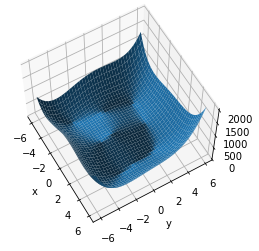

In [196]:
fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
ax.view_init(60,-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### 计算梯度

In [197]:
x = tf.constant([-4.,0.])
for step in range(200):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)
    grads = tape.gradient(y,[x])[0]   
    x-=0.01*grads
    print('step{}:x = {},f(x)={}'.format(step,x,y))

step0:x = [-2.98       -0.09999999],f(x)=146.0
step1:x = [-3.0451765  -0.09548798],f(x)=104.32752990722656
step2:x = [-3.066435   -0.09737314],f(x)=104.04356384277344
step3:x = [-3.0731204  -0.10265726],f(x)=104.01313018798828
step4:x = [-3.0757504  -0.11080538],f(x)=104.0064697265625
step5:x = [-3.07755    -0.12239755],f(x)=103.99784851074219
step6:x = [-3.0795503  -0.13864122],f(x)=103.98136901855469
step7:x = [-3.0822113  -0.16133206],f(x)=103.94928741455078
step8:x = [-3.0859075  -0.19300133],f(x)=103.88674926757812
step9:x = [-3.0910947  -0.23717397],f(x)=103.76502227783203
step10:x = [-3.0984046 -0.298728 ],f(x)=103.52823638916016
step11:x = [-3.1087415  -0.38435638],f(x)=103.06871795654297
step12:x = [-3.1234128 -0.5030979],f(x)=102.18043518066406
step13:x = [-3.1443195 -0.6667793],f(x)=100.47628784179688
step14:x = [-3.1742048 -0.8898816],f(x)=97.25318908691406
step15:x = [-3.2169178 -1.1875615],f(x)=91.3195571899414
step16:x = [-3.2774222 -1.5691173],f(x)=80.93840789794922
ste

# 自定义层或网络

## 自定义Dense

In [198]:
class MyDense(tf.keras.layers.Layer):
    def __init_(self,inp_dim,outp_dim):
        super(MyDense,self).__init__()
        
        self.kernel = self.add_variable('w',[inp_dim,outp_dim])#必须使用add_variable，不能用tf.constant
        self.bias = self.add_variable('b',[outp_dim])
        
    def call(self,inputs,training=None):#training逻辑or test逻辑
        out = inputs @ self.kernel +self.bias
        return out

In [199]:
class MyModel(tf.keras.Model):
    def __init_(self):
        super(MyModel,self).__init__()#使用母类方法初始化
        self.fc1 = MyDense(28*28,256)
        self.fc2 = MyDense(256,128)
        self.fc3 = MyDense(128,64)
        self.fc4 = MyDense(64,32)
        self.fc5 = MyDense(32,10)
    def call(self,input,training=None):
        x = self.fc1(inputs)
        x = tf.nn.relu(x)
        x = self.fc2(x)
        x = tf.nn.relu(x)
        x = self.fc3(x)
        x = tf.nn.relu(x)
        x = self.fc4(x)
        x = tf.nn.relu(x)
        x = self.f(x)
        return xc5
        

# 模型保存和加载

## 保存

In [200]:
#创建模型
def make_network():
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=256,activation=tf.nn.relu),
                                       tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
                                       tf.keras.layers.Dense(units=64,activation=tf.nn.relu),
                                       tf.keras.layers.Dense(units=32,activation=tf.nn.relu),
                                       tf.keras.layers.Dense(units=10)])
    model.build(input_shape=[None,28*28])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01),
                 loss=tf.losses.CategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
    return model

In [201]:
#数据加载
(train_x,train_y),(test_x,test_y) = tf.keras.datasets.fashion_mnist.load_data()
train_x = tf.reshape(train_x,shape=[-1,28*28])
train_y = tf.one_hot(train_y,depth=10)
test_x = tf.reshape(test_x,shape=[-1,28*28])
test_y = tf.one_hot(test_y,depth=10)
def preprocess(x,y):
    x = tf.cast(x,dtype=tf.float32)/255.
    y = tf.cast(y,dtype=tf.int32)
    return x,y
db = tf.data.Dataset.from_tensor_slices((train_x,train_y))
db = db.map(preprocess).shuffle(10000).batch(128)#传入数据预处理进行预处理,.batch是dataset中的一种分类方法，.shuffle表示打乱，10000是打乱的随机数

db_test = tf.data.Dataset.from_tensor_slices((test_x,test_y))
db_test = db_test.map(preprocess).batch(128)

In [202]:
#训练模型
model = make_network()
# model.summary()
model.fit(db,epochs=3,validation_data=db_test,validation_freq=2)#validation_freq=2表示没测试两批输出一个精确度
model.evaluate(db_test)

Epoch 1/3


2021-11-02 10:27:03.035748: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-02 10:27:03.057743: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz


469/469 [==============================] - 5s 9ms/step - loss: 0.8183 - accuracy: 0.7095
Epoch 2/3
469/469 [==============================] - 7s 15ms/step - loss: 0.4142 - accuracy: 0.8501 - val_loss: 0.4446 - val_accuracy: 0.8441
Epoch 3/3
79/79 [==============================] - 1s 7ms/step - loss: 0.4252 - accuracy: 0.8444


[0.42522329092025757, 0.8443999886512756]

### model.save.weights('weights.ckpt')

In [203]:
model.save_weights('weights.ckpt')#在当前目录保存
print('saved weights')
del model

saved weights


### new_model.load_weights（）加载

In [204]:
model = make_network()
model.load_weights('weights.ckpt')
print('loaded weights!')
model.evaluate(db_test)

loaded weights!
79/79 [==============================] - 1s 8ms/step - loss: 0.4231 - accuracy: 0.8430


[0.42522329092025757, 0.8443999886512756]

### model.save()

In [205]:
model.save('model.h5')
print('saved total model')
del model

saved total model


In [206]:
model = tf.keras.models.load_model('model.h5')
model.evaluate(db_test)

79/79 [==============================] - 1s 8ms/step - loss: 0.4252 - accuracy: 0.8444


[0.42522329092025757, 0.8443999886512756]

### tf.saved_model.save() 通用方法,保存的模型可以被c++、pytorch使用

In [207]:
tf.saved_model.save(model,'model_all')
del model

2021-11-02 10:27:23.100687: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_all/assets


In [208]:
imported = tf.saved_model.load('model_all')
model = imported.signatures['serving_default']
x = train_x[0]
x = tf.cast(x,dtype=tf.float32)
x = tf.expand_dims(x,axis=0)
model(x)#x是一个样本的张量,不能使用tf.evaluate

{'dense_11': <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
 array([[-2370.7434 , -2372.072  , -3476.7598 , -3198.3362 , -1991.9661 ,
           508.01358, -2317.6155 ,  2202.2544 ,  -791.62897,  3251.2656 ]],
       dtype=float32)>}

# 交叉验证

model.fit(db_train_val,epoch=6,validation_split=0.1,validation_freq=2)

In [209]:
a = tf.constant([1,0])
b = tf.constant([])
a.shape

TensorShape([2])

## tf.keras.layers.BatchNormalization() 可以把特定维度的值按照正态分布逐步逼近，类似于sigmod
## tf.keras.layers.GlobalMaxPool2D()#用在不确定输出大小,会把所有的像素都均值化
## 优化-动量梯度下降，让权值的变换基于之前变化影响
## 损失函数-正则化，修剪损失函数的高阶项 防止过拟合
## early stopping 、dropout层 防止过拟合
## 动态学习率，越往后学习率越小，防止波动

# RNN

In [210]:
tf.keras.layers.Embedding(10,4)#10表示有多少样本，4表示每个样本的维度，这个层用语把非数字的npl转化为数字

## Rnncell

## rnncell属性 tf.keras.layers.SimpleRNNcell层是需要自己管理每个时间戳的，tf.keras.layers.SimpleRNN不需要

In [214]:
cell = tf.keras.layers.SimpleRNNCell(3)#3表示隐层的长度
cell.build(input_shape=(None,4))
cell.trainable_variables

[<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.38392437,  0.28266525,  0.07292658],
        [ 0.45697188,  0.10429442, -0.40782553],
        [ 0.73064077, -0.22349936, -0.34136516],
        [-0.48606116, -0.08288205,  0.41117454]], dtype=float32)>,
 <tf.Variable 'recurrent_kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 0.3715576 , -0.4096899 , -0.8331261 ],
        [ 0.120496  , -0.86849856,  0.48082316],
        [ 0.9205572 ,  0.2790419 ,  0.27333128]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

## rnncell内部结构

In [231]:
x = tf.random.normal([4,80,100])#（【样本数，单词数，每个单词的维度】）
xt0 = x[:,0,:]#表示取全部样本的第一个单词的
cell = tf.keras.layers.SimpleRNNCell(64)
out,xt1 =cell(xt0,[tf.zeros([4,64])])#当前的单词和上一个时间戳的状态（语义）获得下一个状态
xt1[0].shape,out.shape#xt1是一个装在；列表中的tensor

(TensorShape([4, 64]), TensorShape([4, 64]))

In [233]:
id(out),id(xt1[0])#本质是一个值

(139795034546768, 139795034546768)

## 多层Rnn

In [236]:
x = tf.random.normal([4,80,100])
xt0 = x[:,0,]
cell1 = tf.keras.layers.SimpleRNNCell(64)
cell2 = tf.keras.layers.SimpleRNNCell(64)
state1 = [tf.zeros([4,64])]#第一层的0状态信息
state2 = [tf.zeros([4,64])]#第二层的0状态信息
out1,state1 = cell1(xt0,state1)
out2,state2 = cell2(out1,state2)#更新

out1.shape,out2.shape,state1[0].shape,state2[0].shape
    

(TensorShape([4, 64]),
 TensorShape([4, 64]),
 TensorShape([4, 64]),
 TensorShape([4, 64]))